In [8]:
task_names = ["HotpotQA", "MultispanQA", "GSM8K", "MMLU", "Hellaswag", "RACE", "PIQA"] # names of tasks where at GPT 3.5 or 4 has gen. outperforming disc.
ug_orig_35 = [.02, None, .412, None, None, .012, .005] # original understanding gap on GPT 3.5
ug_new_35 = [-.01, None, .412, None, None, .004, .005] # lowest understanding gap on GPT 3.5 after experimenting with prompts
ug_orig_4 = [.14, .06, .69, .597, .295, .043, .055]
ug_new_4 = [0, 0, .235, .014, .295, .043, .055]

In [9]:
import pandas as pd
from io import StringIO
import seaborn as sns
import matplotlib.pyplot as plt

csv_data = """
task_names,ug_orig_35,ug_new_35,ug_orig_4,ug_new_4
HotpotQA,0.02,-0.01,0.14,0.0
MultispanQA,,,0.06,0.0
GSM8K,0.412,0.412,0.69,0.235
MMLU,,,0.597,0.014
Hellaswag,,,0.295,0.295
RACE,0.012,0.004,0.043,0.043
PIQA,0.005,0.005,0.055,0.055
"""

# Loading CSV data into pandas DataFrame
df = pd.read_csv(StringIO(csv_data))

# Display the DataFrame
print(df)

    task_names  ug_orig_35  ug_new_35  ug_orig_4  ug_new_4
0     HotpotQA       0.020     -0.010      0.140     0.000
1  MultispanQA         NaN        NaN      0.060     0.000
2        GSM8K       0.412      0.412      0.690     0.235
3         MMLU         NaN        NaN      0.597     0.014
4    Hellaswag         NaN        NaN      0.295     0.295
5         RACE       0.012      0.004      0.043     0.043
6         PIQA       0.005      0.005      0.055     0.055


In [10]:
gpt35 = df[['task_names', 'ug_orig_35', 'ug_new_35']].rename(columns={'ug_orig_35': 'orig', 'ug_new_35': 'new'})
gpt35['model'] = 'gpt-3.5'
gpt4 = df[['task_names', 'ug_orig_4', 'ug_new_4']].rename(columns={'ug_orig_4': 'orig', 'ug_new_4': 'new'})
gpt4['model'] = 'gpt-4'

In [11]:
df = pd.concat([gpt35, gpt4])

In [12]:
df = df.melt(id_vars=['task_names', 'model'], value_vars=['new', 'orig'], var_name='type', value_name='score')

In [13]:
gpt3 = df[(df['model'] == 'gpt-3.5')]
gpt4 = df[(df['model'] == 'gpt-4')]

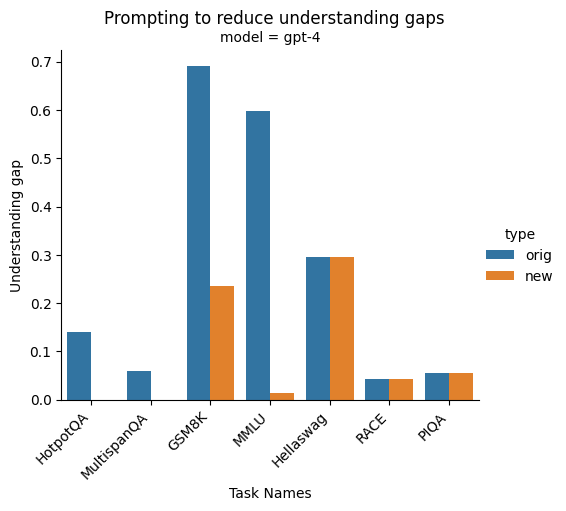

In [18]:
# Create the catplot
g = sns.catplot(data=gpt4, x='task_names', y='score', kind='bar', hue='type', col='model', hue_order=['orig', 'new'])

# Rotate x-axis labels for better readability
g.set_xticklabels(rotation=45, horizontalalignment='right')

# Optionally, you can adjust the size of the plot to make sure everything fits well
plt.subplots_adjust(bottom=0.2)  # You might need to tweak this value

# Add title
plt.subplots_adjust(top=0.9)  # Adjust the top margin for title
g.fig.suptitle('Prompting to reduce understanding gaps')

g.set_axis_labels('Task Names', 'Understanding gap')

# Save the plot as a vectorized PDF
plt.savefig('prompt_und_gap_bar.pdf', format='pdf')

# Show the plot
plt.show()